# Phương Pháp K-Nearest neighbors 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
from sklearn.utils import shuffle

## Ví dụ A.1

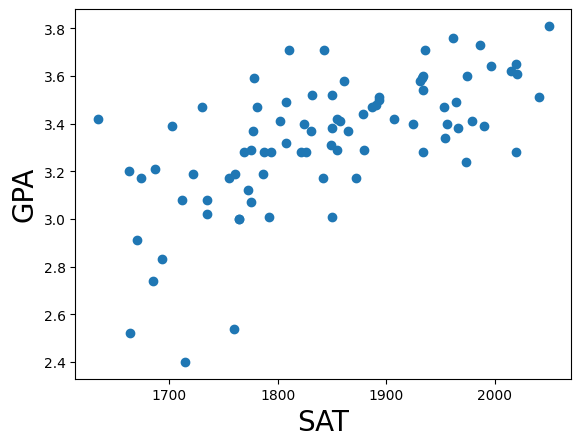

In [3]:
#change to data path on your computer 
data = pd.read_csv('C:\\ML_TH\\ML\\week2\\SAT_GPA.csv')
data.describe()
y_A1 = data['GPA']
x_A1 = data['SAT']
plt.scatter(x_A1, y_A1)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [4]:
k = 8
# trộn dữ liệu
x_A1, y_A1 = shuffle(x_A1, y_A1)
# tính khoảng cách các điểm trong train tới điểm trong test 
def distance(array, value):
    array = np.array(array)
    return abs(array - value)

# tìm k chỉ số gần điểm test trong train data
def find_nearst_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]


data_len = len(x_A1)
# chia dữ liệu
X_train_A1 = np.array(x_A1[:64])
Y_train_A1 = np.array(y_A1[:64])

X_test_A1 = np.array(x_A1[64:data_len])
Y_test_A1 = np.array(y_A1[64:data_len])

Y_pred_A1 = np.zeros(len(X_test_A1))

for i in range(len(X_test_A1)):
    indexis = find_nearst_index(X_train_A1, X_test_A1[i], k)
    for id in indexis:
        Y_pred_A1[i] = Y_pred_A1[i] + Y_train_A1[i]
    Y_pred_A1[i] = Y_pred_A1[i] / len(indexis)
    print(Y_pred_A1[i], '|', Y_test_A1[i])
# tính giá trị trung bình của tổng bình phương sai sô, giá trị trung bình tổng sai số tuyệt đối và r2_square
print(r2_score(Y_test_A1, Y_pred_A1))
print(mean_absolute_error(Y_test_A1, Y_pred_A1))
print(mean_squared_error(Y_test_A1, Y_pred_A1))

3.3999999999999995 | 3.47
3.1200000000000006 | 3.59
3.2800000000000002 | 3.6
3.01 | 3.49
3.420000000000001 | 3.41
2.52 | 3.81
3.39 | 3.58
3.3799999999999994 | 3.28
3.2800000000000002 | 3.51
3.17 | 3.76
3.2100000000000004 | 3.64
3.5 | 3.29
3.0 | 3.4
3.1900000000000004 | 3.6
3.240000000000001 | 3.41
3.08 | 3.54
3.08 | 3.62
3.1900000000000004 | 2.91
3.2800000000000002 | 3.28
3.7100000000000004 | 2.83
-3.006933222123755
0.37649999999999995
0.23059499999999997


## Ví dụ A.2

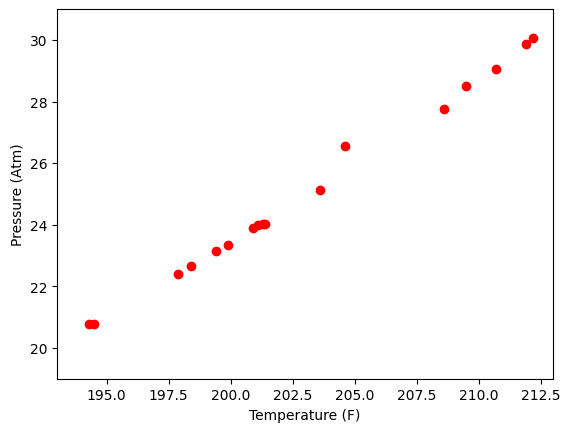

In [5]:
# Temp (H degree)
X_A2 = np.array(
    [194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9,
     212.2]).T

#Press(Atm)

y_A2 = np.array(
    [20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88,
     30.06]).T

#visualize data

plt.plot(X_A2, y_A2, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [6]:
k = 4

# tính khoảng cách các điểm trong train tới điểm trong test
def distance(train, value):
    train = np.array(train)
    return abs(train - value)

# tìm k chỉ số gần điểm test trong train data
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]


# trộn dữ liệu
X_A2, y_A2 = shuffle(X_A2, y_A2, random_state=0)
len_data = len(X_A2)
# chia dữ liệu theo yêu cầu đề bài
X_train_A2 = X_A2[:12]
y_train_A2 = y_A2[:12]
X_test_A2 = X_A2[12:]
y_test_A2 = y_A2[12:]
y_pred_A2 = np.zeros(len(X_test_A2))

for i in range(len(X_test_A2)):
    indexis = find_nearst_index(X_train_A2, X_test_A2[i], k)
    for id in indexis:
        y_pred_A2[i] = y_pred_A2[i] + y_train_A2[id]
    y_pred_A2[i] = y_pred_A2[i] / k
    print(y_pred_A2[i], '|', y_test_A2[i])
# tính giá trị trung bình của tổng bình phương sai sô, giá trị trung bình tổng sai số tuyệt đối và r2_square
print(mean_squared_error(y_test_A2, y_pred_A2))
print(mean_squared_error(y_test_A2, y_pred_A2))
print(r2_score(y_test_A2, y_pred_A2))

23.357499999999998 | 22.67
22.5575 | 20.79
23.76 | 23.35
28.3575 | 29.88
28.3575 | 28.49
1.2200749999999985
1.2200749999999985
0.9013897851270022


   # Ví dụ A.3

In [7]:

#đọc dữ liệu
with open('fuel.txt') as f:
    lines = f.readlines()

X_data_A3 = []
y_data_A3 = []
lines.pop(0)  # xóa dòng đầu tiên head

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    log_miles = math.log2(splitted[3])
    X_data_A3.append([splitted[-1], dlic, splitted[2], log_miles])
    y_data_A3.append(fuel)

# chia dữ liệu thành phần training 40 mẫu và còn lại là validation
X_data_A3, y_data_A3 = shuffle(X_data_A3, y_data_A3)
X_train_A3 = np.array(X_data_A3[:40])
X_test_A3 = np.array(X_data_A3[40:])

y_train_A3 = np.array(y_data_A3[:40])
y_test_A3 = np.array(y_data_A3[40:])
y_pred_A3 = np.zeros(len(X_test_A3))
k = 6


# tính khoảng cách nhiều chiều bằng norm
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord=2, axis=1)


# tính k chỉ số gần với value nhất
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]


# duyệt tập test và trả về dự đoán
for i in range(len(X_test_A3)):
    indexis = find_nearest_index(X_train_A3, X_test_A3[i], k)
    for id in indexis:
        y_pred_A3[i] = y_pred_A3[i] + y_train_A3[id]
    y_pred_A3[i] = y_pred_A3[i] / k
    print(y_test_A3[i], '|', y_pred_A3[i])

# tính giá trị trung bình của tổng bình phương sai sô, giá trị trung bình tổng sai số tuyệt đối và r2_square
print(mean_squared_error(y_test_A3, y_pred_A3))
print(mean_absolute_error(y_test_A3, y_pred_A3))
print(r2_score(y_test_A3, y_pred_A3))

600.9024094857928 | 625.293278870854
556.3455122409412 | 599.7620627266054
690.2644175749931 | 647.0329244812123
482.3269371605634 | 559.4019893258397
374.1640695684424 | 610.4413705020553
543.2320681660389 | 589.9536134835306
645.44182635314 | 692.4015342295587
616.6115116683296 | 606.8462851804431
638.2310609545192 | 651.1968773659668
317.492397161607 | 589.9536134835306
514.2792225950783 | 609.8863356925268
14013.074858365686
82.62471741600112
-0.149800644337309


# Phương pháp hồi quy tuyến tính

## Ví dụ B.1

In [8]:
# Temp (H degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7,
               211.9, 212.2]]).T

#Press(Atm)

y = np.array([[20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04,
               29.88, 30.06]]).T


(17, 1)


w=  [[-81.06372713]
 [  0.5228924 ]]


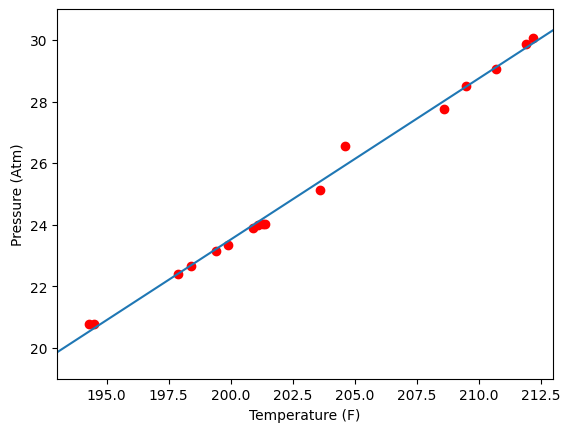

In [9]:
one = np.ones((X.shape[0], 1))
x_data_B1 = np.concatenate((one, X), axis=1)

A = np.dot(x_data_B1.T, x_data_B1)
b = np.dot(x_data_B1.T, y)

w = np.dot(np.linalg.pinv(A), b)
print('w= ', w)

w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1 * x0
plt.plot(X.T, y.T, 'ro')
plt.plot(x0, y0)
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

## Ví dụ B.2

### Sử dụng numpy

In [10]:
# lấy lại dữ liệu từ bên trên bài A3
x_data_B2, y_data_B2 = np.array(X_data_A3), np.array(y_data_A3)


def qr_househoder(A):
    M = A.shape[0]
    N = A.shape[1]

    # xây dựng ma trận cột trực chuẩn Q
    Q = np.identity(M)

    # xây dựng ma trận R
    R = np.copy(A)

    for n in range(N):
        x = A[n:, n]
        k = x.shape[0]

        ro = -np.sign(x[0]) * np.linalg.norm(x)

        e = np.zeros(k)

        e[0] = 1

        v = (1 / (x[0] - ro)) * (x - (ro * e))

        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v @ v)) * ((np.outer(v, v)) @ R[n:, i])

        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v @ v)) * ((np.outer(v, v)) @ Q[n:, i])
    return Q.transpose(), R


def linear_regression(x_data, y_data):
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_househoder(x_bars)
    R_pinv = np.linalg.pinv(R)
    A = np.dot(R_pinv, Q.T)
    return np.dot(R_pinv, Q.T)


w = linear_regression(x_data_B2, y_data_B2)
w = w.T.tolist()

line = ['Intercept', 'Tax', 'Dlic', 'Income', 'logMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 0.3561389540590141
                 Tax: 0.005017152958203624
                Dlic: -4.469533774770782e-05
              Income: -7.736705112992291e-06
            logMiles: -0.011273847003346764


## Sử dụng thư viện sklearn

In [11]:
from sklearn import datasets, linear_model

In [12]:
# chạy với thư viện sklearn
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(x_data_B2, y_data_B2)
print(regr.coef_)

[-3.74051992e+00  5.41605284e-01 -5.11305283e-03  2.18465502e+01]


## Bài tập B.1

In [13]:
# trộn dữ liệu
x_data_B2, y_data_B2 = shuffle(x_data_B2, y_data_B2)
print(x_data_B2.shape)
# chia dữ liệu theo yêu cầu đề bài
x_train_B1 = x_data_B2[:40]
y_train_B1 = y_data_B2[:40]
x_test_B1 = x_data_B2[40:]
y_test_B1 = y_data_B2[40:]
# lấy ra mô hình
regr = linear_model.LinearRegression(fit_intercept=False)
# traing mô hình
regr.fit(x_train_B1, y_train_B1)
# test
pred = regr.predict(x_test_B1)
# tính giá trị trung bình của tổng bình phương sai sô, giá trị trung bình tổng sai số tuyệt đối và r2_square
print(mean_squared_error(y_test_B1, regr.predict(x_test_B1)))
print(mean_absolute_error(y_test_B1, regr.predict(x_test_B1)))
print(r2_score(y_test_B1, pred))

(51, 4)
1673.7622894245817
31.16462163735382
0.8259401941311793


## Ví dụ B.3( bài thực hành 1)

### dùng thư viện np

In [14]:
#(i)
x_data_B3, y_data_B3 = np.array(x_A1).reshape(len(x_A1)), np.array(y_A1)
# tính hệ số pearson bằng np
print(np.corrcoef(x_data_B3, y_data_B3)[0, 1])

0.637184364840191


### dùng thư viện sci

In [15]:
from scipy.stats import pearsonr

# tính hệ số pearson bằng sci
print(pearsonr(x_data_B3, y_data_B3))

PearsonRResult(statistic=np.float64(0.6371843648401909), pvalue=np.float64(7.199518436564236e-11))


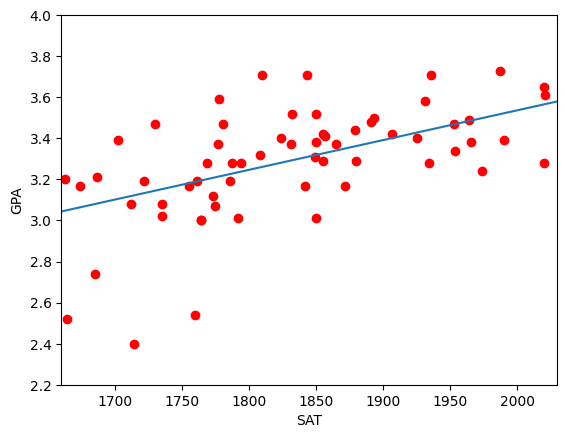

In [16]:
#(ii)
x_train_B3, y_train_B3, x_test_B3, y_test_B3 = X_train_A1.reshape(X_train_A1.shape[0],
                                                                  1), Y_train_A1, X_test_A1.reshape(X_test_A1.shape[0],
                                                                                                    1), Y_test_A1
#(iii)
ones = np.ones((x_train_B3.shape[0], 1))
x_bars = np.concatenate((ones, x_train_B3), axis=1)
# A = np.dot(x_bars.T,x_bars)
# b = np.dot(x_bars.T,y_train_B3)
# w = np.dot(np.linalg.pinv(A),b)
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(x_bars, y_train_B3)
w = regr.coef_
# vẽ biểu đồ, lấy ra trọng số
w_0 = w[0]
w_1 = w[1]

x0 = np.linspace(1660, 2030, 2)
y0 = w_0 + w_1 * x0
plt.plot(x_train_B3, y_train_B3, 'ro')
plt.plot(x0, y0)
plt.axis([1660, 2030, 2.2, 4])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [17]:
ones = np.ones((x_test_B3.shape[0], 1))
# tạo thêm cột toàn số 1 để th theta0
x_bars = np.concatenate((ones, x_test_B3), axis=1)
#test
y_pred_B3 = regr.predict(x_bars)
# tính giá trị trung bình của tổng bình phương sai sô, giá trị trung bình tổng sai số tuyệt đối và r2_square
print(mean_squared_error(y_test_B3, y_pred_B3))
print(mean_absolute_error(y_test_B3, y_pred_B3))
print(r2_score(y_test_B3, y_pred_B3))

0.023933571407890056
0.13442508083446353
0.5841183789833002


## Ví dụ B.4( Bài tập 2)

In [18]:
x_data_B4 = []
y_data_B4 = []
# đọc dữ liệu
with open('vidu4_lin_reg.txt') as f:
    lines = f.readlines()
lines.pop(0)
for line in lines:
    line = line.replace('\n', '').split(' ')
    line = list(map(float, line))
    x_data_B4.append([1, line[1], line[5], line[4], line[3], line[2]])
    y_data_B4.append(line[-1])
# chuyển dữ liệu về dạng np
x_data_B4 = np.array(x_data_B4)
y_data_B4 = np.array(y_data_B4)
# xáo trộn dữ liệu
x_data_B4, y_data_B4 = shuffle(x_data_B4, y_data_B4)

# chia dữ liệu với 80 dòng trainning và còn lại là test
x_train_B4 = x_data_B4[:80]
y_train_B4 = y_data_B4[:80]

x_test_B4 = x_data_B4[80:]
y_test_B4 = y_data_B4[80:]
# lấy ra mô hình 
regr = linear_model.LinearRegression(fit_intercept=False)
# xác định hệ số với 100 dữ liệu
regr.fit(x_data_B4, y_data_B4)
print(regr.coef_)
#train dữ liệu
regr.fit(x_train_B4, y_train_B4)
# tính hệ số 
w = regr.coef_
print(w)
# test với dữ liệu test
y_pred_B4 = regr.predict(x_test_B4)

# tính kì vọng sai số
mean_error = np.mean(abs(y_test_B4 - y_pred_B4))
# tính  phương sai sai số
var_error = np.var(abs(y_test_B4 - y_pred_B4), ddof=1)

print(mean_error)
print(var_error)

[-0.10802908  0.00994694  0.03847025  0.0076701   0.00218137 -0.00020655]
[-0.18345034  0.009443    0.0187378   0.02393702  0.00341355 -0.0044112 ]
0.36492660797682186
0.14978579200606115


## Ví dụ B.5(Bài tập 3)

### linear regression

In [19]:
# đọc dữ liệu
with open('real_estate.csv') as f:
    lines = f.readlines()
x_data_B5 = []
y_data_B5 = []
lines.pop(0)

for line in lines:
    line = line.replace('\n', '').split(',')
    line.pop(0)
    line = list(map(float, line))
    line = np.array(line)
    x_data_B5.append([1, int(line[0]), line[1], line[2], line[3], line[4]])
    y_data_B5.append(line[-1])
# chuyển dữ liệu về dạng np
x_data_B5 = np.array(x_data_B5)
y_data_B5 = np.array(y_data_B5)
# trộn dữ liệu
x_data_B5, y_data_B5 = shuffle(x_data_B5, y_data_B5)
# lấy dữ liệu traing và test
x_train_B5 = x_data_B5[:350]
y_train_B5 = y_data_B5[:350]

x_test_B5 = x_data_B5[350:]
y_test_B5 = y_data_B5[350:]
#lấy ra mô hình
regr = linear_model.LinearRegression(fit_intercept=False)
#train mô hình
regr.fit(x_train_B5, y_train_B5)
# in ra hệ số
print(regr.coef_)
# test
y_pred_B5 = regr.predict(x_test_B5)
#tính toán tổng bình phương sai số và tính r2_square
print(len(y_test_B5) * mean_squared_error(y_test_B5, y_pred_B5))
print(r2_score(y_test_B5, y_pred_B5))

[-1.29098369e+04  3.57330362e+00 -2.55947198e-01 -4.31544353e-03
  1.07974570e+00  2.30718699e+02]
2383.83119011948
0.7249220249779699


### K nearest neighbors

In [20]:
k = 18
y_pred_KNN_B5 = np.zeros(len(y_test_B5))
for i in range(len(x_test_B5)):
    indexis = find_nearst_index(x_train_B5, x_test_B5[i], k)
    for id in indexis:
        y_pred_KNN_B5[i] += y_train_B5[id]
    y_pred_KNN_B5[i] /= k
    print(y_pred_KNN_B5[i], '|', y_test_B5[i])

print(len(y_test_B5) * mean_squared_error(y_test_B5, y_pred_KNN_B5))
print(r2_score(y_test_B5, y_pred_KNN_B5))

23.833333333333336 | 34.3
25.62777777777778 | 23.8
46.516666666666666 | 39.1
55.28333333333334 | 57.8
27.250000000000004 | 25.7
53.1888888888889 | 59.6
44.82222222222222 | 45.4
26.9 | 20.7
42.1888888888889 | 47.7
50.361111111111114 | 50.4
27.755555555555556 | 24.7
42.74999999999999 | 40.3
53.1888888888889 | 55.0
42.68333333333334 | 36.9
44.766666666666666 | 38.1
53.1888888888889 | 51.7
40.544444444444444 | 39.7
41.16111111111111 | 30.9
53.1888888888889 | 42.1
26.9 | 22.1
27.816666666666666 | 30.7
43.37222222222223 | 40.9
43.238888888888894 | 43.7
23.666666666666668 | 29.3
45.42777777777778 | 49.3
38.04444444444445 | 41.9
42.99444444444444 | 42.0
53.1888888888889 | 46.1
29.966666666666672 | 27.0
38.666666666666664 | 34.7
30.04444444444444 | 27.0
55.28333333333333 | 49.7
47.12222222222223 | 44.0
38.92777777777778 | 28.8
38.516666666666666 | 37.0
45.0 | 53.3
43.761111111111106 | 42.2
38.12222222222223 | 36.8
39.1 | 37.5
25.62777777777778 | 12.8
40.17777777777778 | 39.3
27.250000000000004 

sau khi chay và so sánh đáp án 2 mô hình ta thấy được phương pháp KNN đưa ra được tổng bình phương sai số nhỏ hơn so với linear regression, cho thấy được có thể KNN hiệu quả hơn với linear regression với tập dữ liệu này